Logistic Regression Analysis


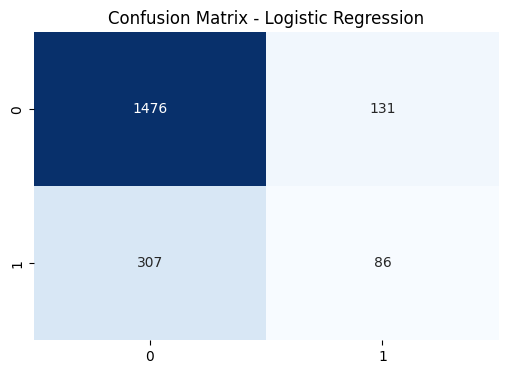

Calculated logistic loss 0.2796225967210267
RCU Curve for Logistic Regression


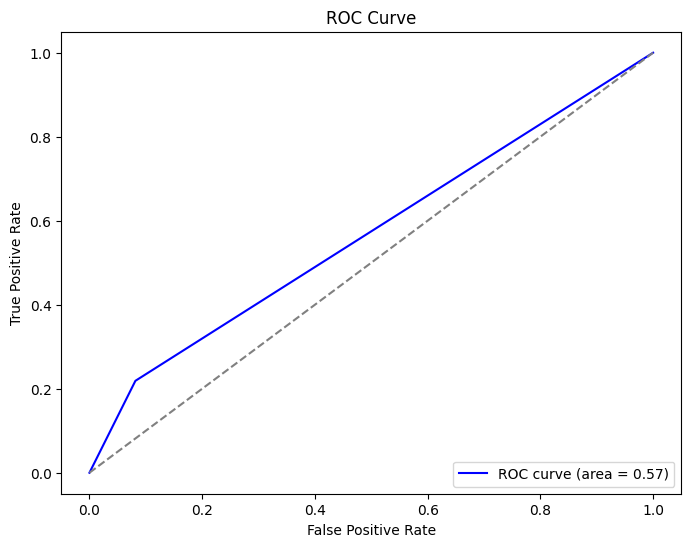

Learning Curve Stat: Train and Test Accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


640 samples were used to train the model
The average train accuracy is 0.99
The average test accuracy is 0.77
1280 samples were used to train the model
The average train accuracy is 0.94
The average test accuracy is 0.75
1920 samples were used to train the model
The average train accuracy is 0.93
The average test accuracy is 0.75
3200 samples were used to train the model
The average train accuracy is 0.91
The average test accuracy is 0.75
3840 samples were used to train the model
The average train accuracy is 0.90
The average test accuracy is 0.76
5760 samples were used to train the model
The average train accuracy is 0.88
The average test accuracy is 0.75


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve
print("Logistic Regression Analysis")

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6,4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

print("Calculated logistic loss", loss)

print("RCU Curve for Logistic Regression")
y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

print("Learning Curve Stat: Train and Test Accuracy")
# Learning Curve (Help fromhttps://scikit-learn.org/dev/modules/generated/sklearn.model_selection.learning_curve.html)
train_size_abs, train_scores, test_scores = learning_curve(logreg, X_train, y_train, train_sizes=[0.1, 0.2, 0.3, 0.5, 0.6, 0.9])
for train_size, cv_train_scores, cv_test_scores in zip(train_size_abs, train_scores, test_scores):
  print(f"{train_size} samples were used to train the model")
  print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
  print(f"The average test accuracy is {cv_test_scores.mean():.2f}")



In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix, log_loss

# Load the dataset
data = pd.read_csv('/content/churn.csv')

# Inspect the columns to avoid the KeyError
print("Columns in the dataset:")
print(data.columns)

# Initial data exploration
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())

# Encode categorical variables: Geography and Gender (One-Hot Encoding)
data = pd.get_dummies(data, drop_first=True)

# Splitting the dataset into features (X) and target (y)
# Ensure that we're excluding the correct non-predictive columns based on the dataset structure
X = data.drop(['Exited', 'CustomerId'], axis=1)  # Excluding 'Exited' (target) and 'CustomerId' (non-predictive)
y = data['Exited']  # Target variable

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data (Important for some models like neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection - Logistic Regression
logreg = LogisticRegression(random_state=42)
model = logreg.fit(X_train, y_train)
loss = log_loss(y_train, model.predict_proba(X_train))

# Predictions for Logistic Regression
y_pred_logreg = logreg.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

# F1 Score, Precision, and Recall
f1 = f1_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)

print("\nF1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Max Iterations: 100")


Columns in the dataset:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

First 5 rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1   

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64


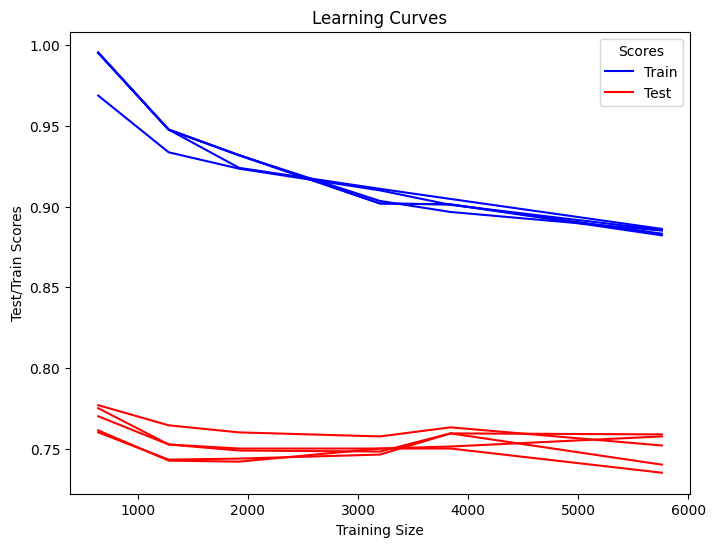

In [ ]:
plt.figure(figsize=(8, 6))
train = plt.plot(train_size_abs, train_scores, color='blue')
test = plt.plot(train_size_abs, test_scores, color='red')
plt.title("Learning Curves")
plt.xlabel('Training Size')
plt.ylabel('Test/Train Scores')
plt.legend(handles=[train[0], test[0]], title='Scores', labels=['Train', 'Test'])
plt.show()

Columns in the dataset:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

First 5 rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1   

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7182 - loss: 0.6120 - val_accuracy: 0.7980 - val_loss: 0.5166
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8176 - loss: 0.3882 - val_accuracy: 0.7835 - val_loss: 0.5916
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8473 - loss: 0.3196 - val_accuracy: 0.7765 - val_loss: 0.5968
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8572 - loss: 0.2982 - val_accuracy: 0.7880 - val_loss: 0.6302
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8691 - loss: 0.2773 - val_accuracy: 0.7810 - val_loss: 0.6365
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8834 - loss: 0.2504 - val_accuracy: 0.7855 - val_loss: 0.6545
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8903 - loss: 0.2414 - val_accuracy: 0.7880 - val_loss: 0.6637
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9013 - loss: 0.2210 - val_accuracy: 0.

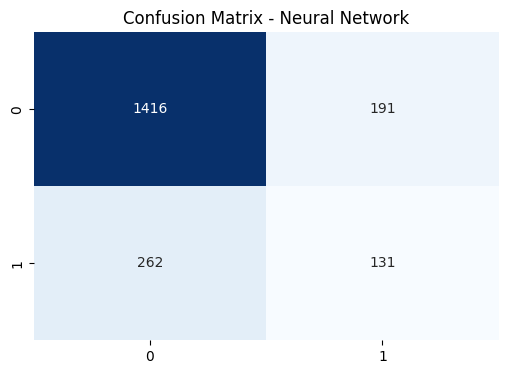

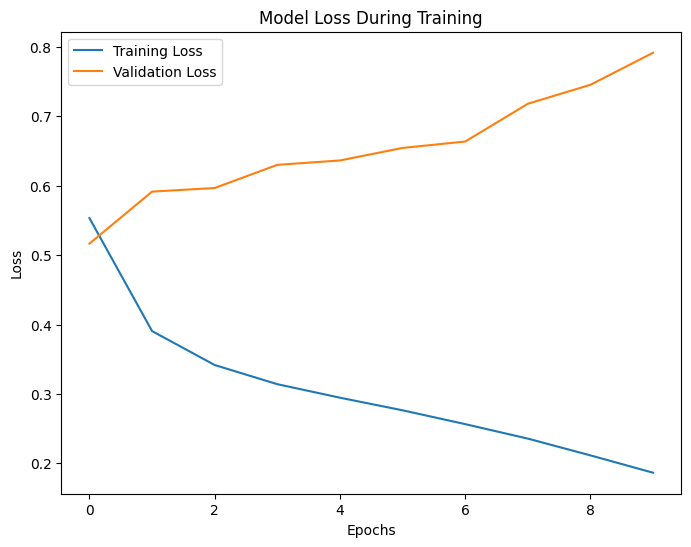

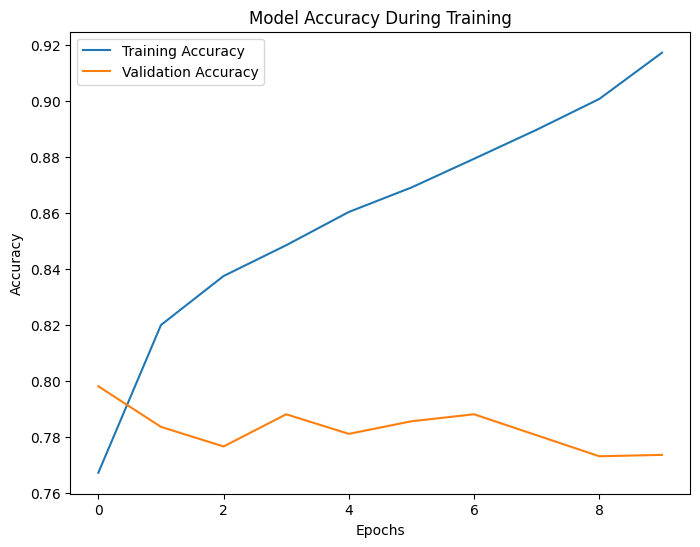

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('/content/churn.csv')

# Inspecting the columns
print("Columns in the dataset:")
print(data.columns)

# Initial data exploration
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())

# Encode categorical variables: Geography and Gender (One-Hot Encoding)
data = pd.get_dummies(data, drop_first=True)

# Splitting the dataset into features (X) and target (y)
X = data.drop(['Exited', 'CustomerId'], axis=1)  # Excluding 'Exited' (target) and 'CustomerId' (non-predictive)
y = data['Exited']  # Target variable

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data (Important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural Network model
model = Sequential()

# Input layer (based on the number of features in X_train)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for 10 epochs
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluating the model on the test set
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

# F1 Score, Precision, and Recall
f1 = f1_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)

print("\nF1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)

# Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6,4))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Neural Network")
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy over epochs
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


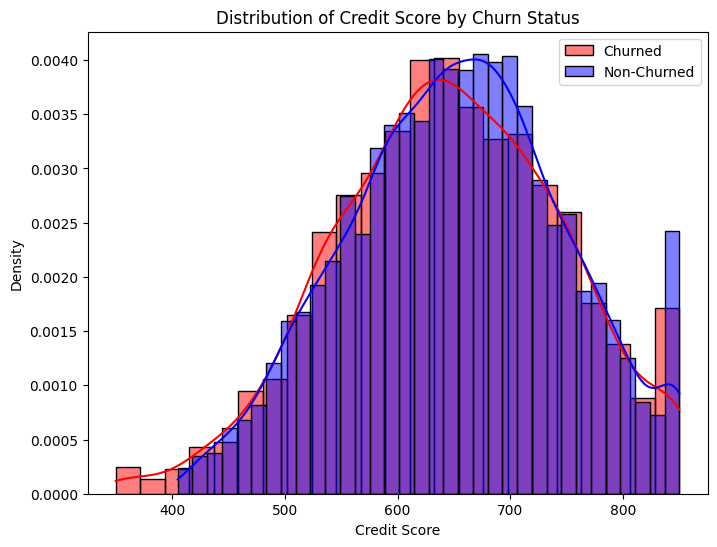

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data[data['Exited'] == 1]['CreditScore'], kde=True, color='red', label='Churned', stat='density')
sns.histplot(data[data['Exited'] == 0]['CreditScore'], kde=True, color='blue', label='Non-Churned', stat='density')
plt.legend()
plt.title("Distribution of Credit Score by Churn Status")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.show()


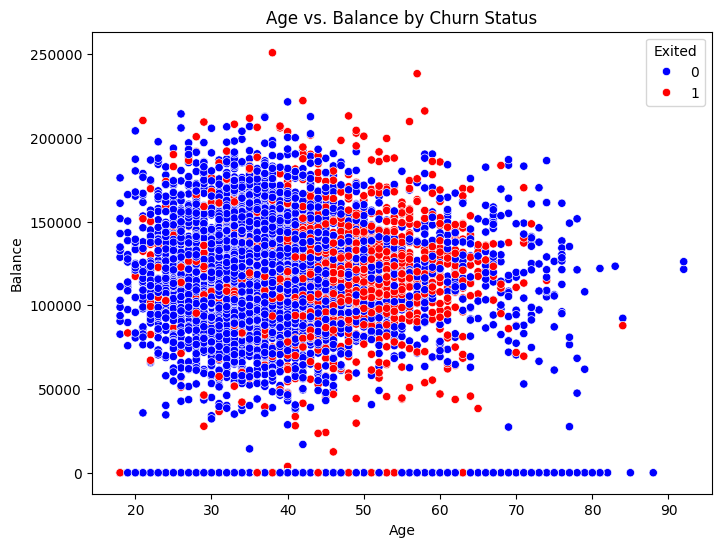

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Balance', hue='Exited', palette={0: 'blue', 1: 'red'})
plt.title('Age vs. Balance by Churn Status')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()


<ipython-input-7-61f9a1c6cc97>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=data, palette={'0': 'blue', '1': 'red'})  # Use strings as keys in palette


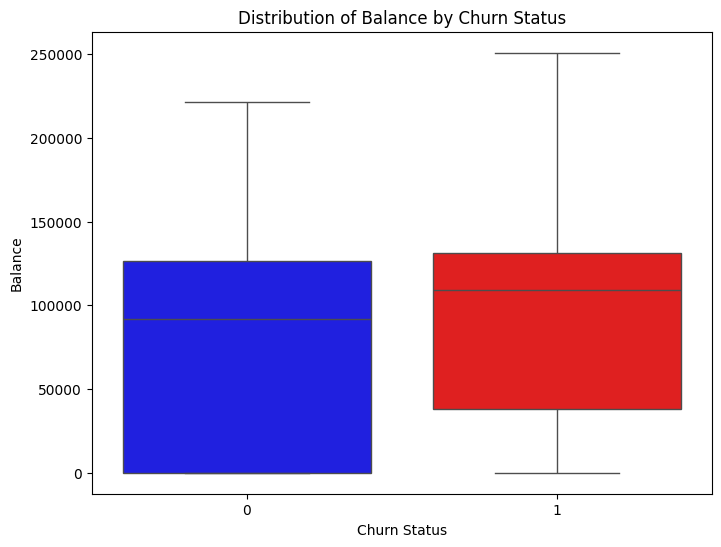

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with the correct path to your dataset)
data = pd.read_csv('/content/churn.csv')

# Visualize the distribution of balance by churn status (Exited)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Balance', data=data, palette={'0': 'blue', '1': 'red'})  # Use strings as keys in palette
plt.title('Distribution of Balance by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Balance')
plt.show()


<ipython-input-8-190c1536a167>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_idx], y=X.columns[sorted_idx], palette="Blues_d")


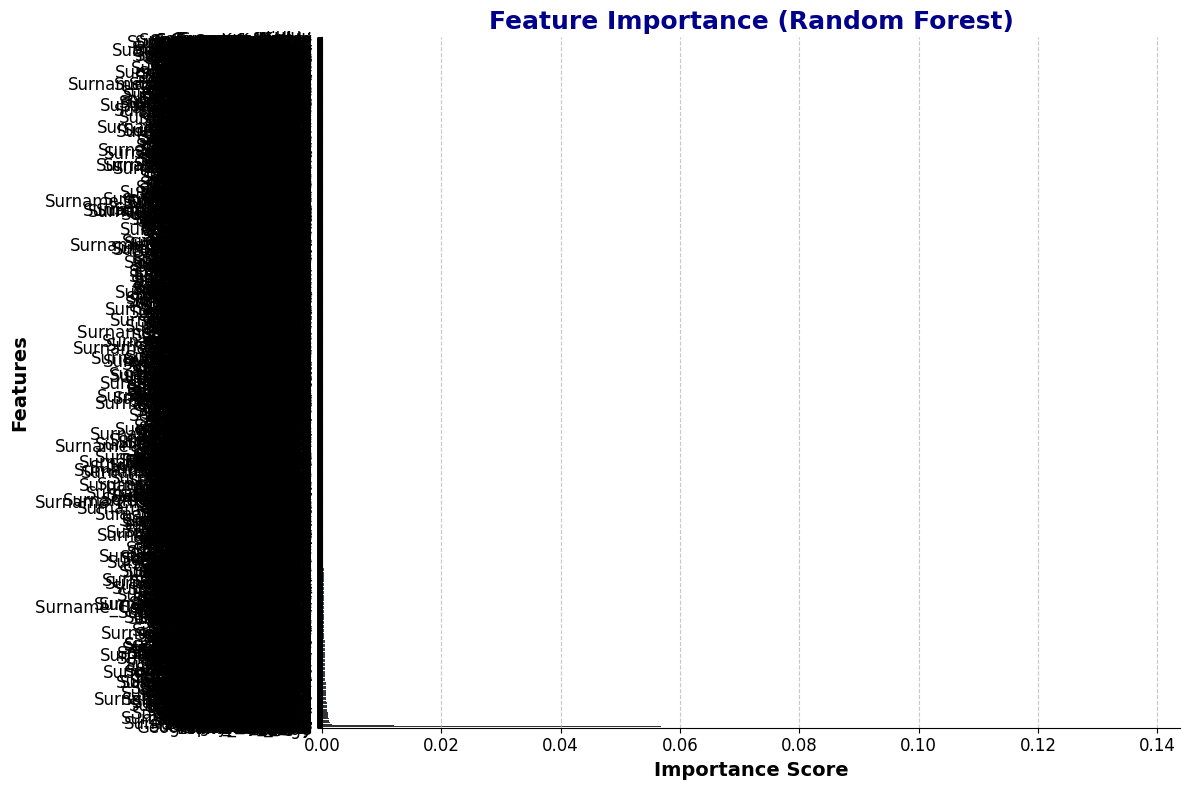

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Train a Random Forest model for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances and sort them
feature_importances = rf.feature_importances_
sorted_idx = feature_importances.argsort()

# Feature importance plot
plt.figure(figsize=(12, 8))  # Increased figure size for clarity

# Sorted feature importance plot
sns.barplot(x=feature_importances[sorted_idx], y=X.columns[sorted_idx], palette="Blues_d")

# Title and labels with improved formatting
plt.title('Feature Importance (Random Forest)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Importance Score', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Features', fontsize=14, fontweight='bold', color='black')

# Styling the axes to be cleaner
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Add a grid only on the x-axis
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Ensure the plot fits well in the figure area
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


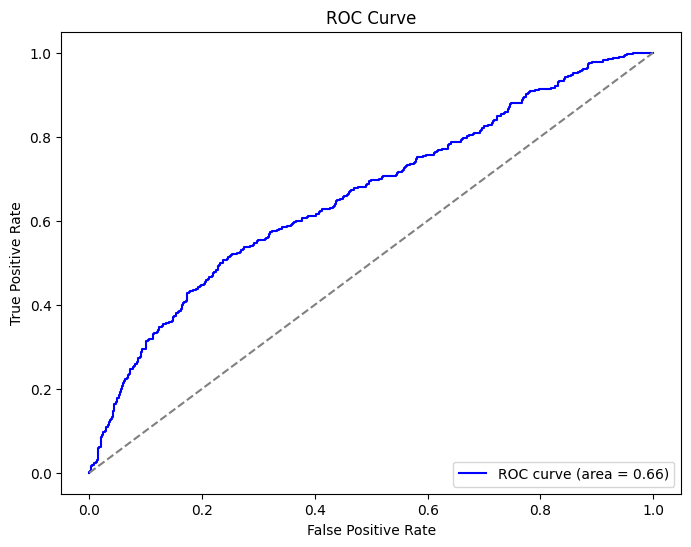

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities
y_pred_prob = model.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


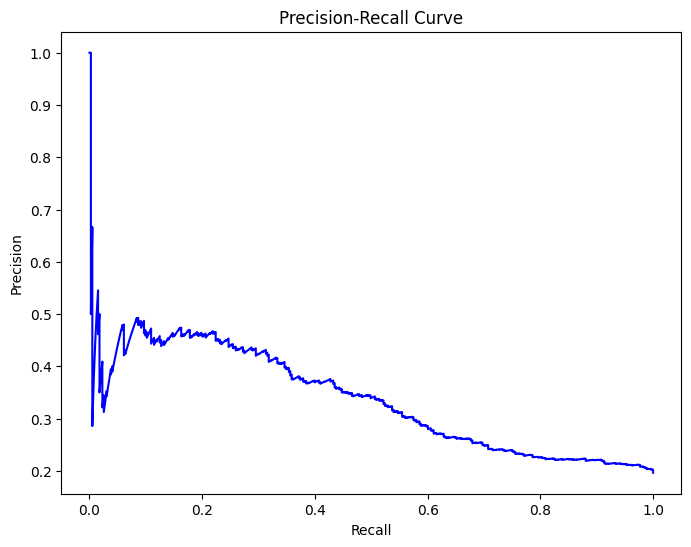

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


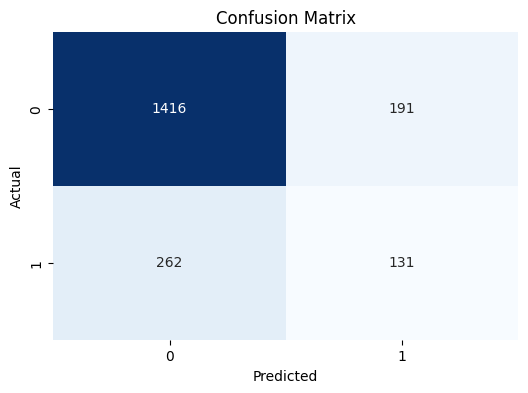

In [ ]:
cm = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<ipython-input-12-d571a285e717>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumOfProducts', y='Exited', data=data, estimator='mean', palette='Blues')


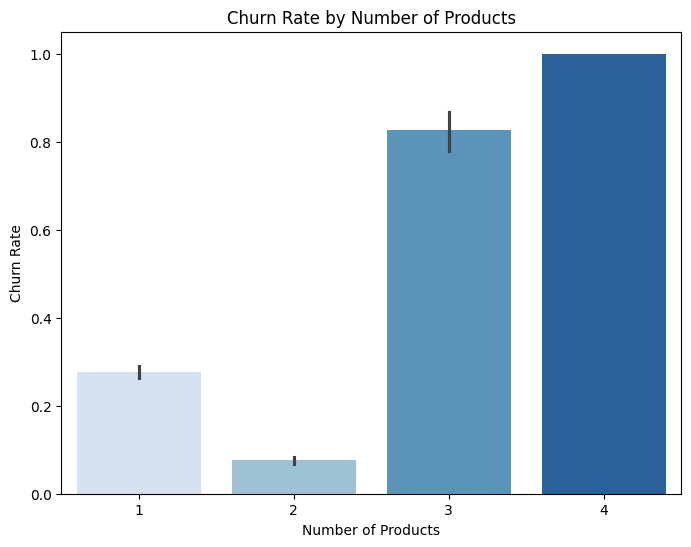

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='NumOfProducts', y='Exited', data=data, estimator='mean', palette='Blues')
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.show()


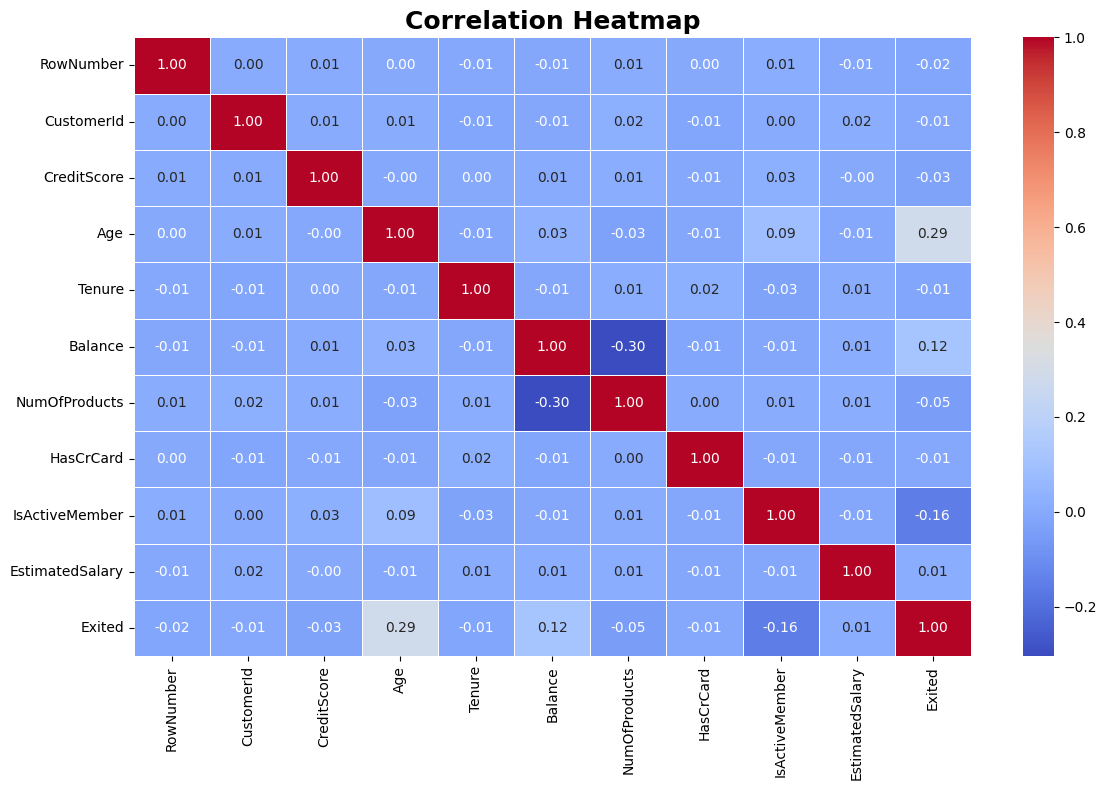

In [ ]:
# Select only numeric columns from the dataset
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
corr = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


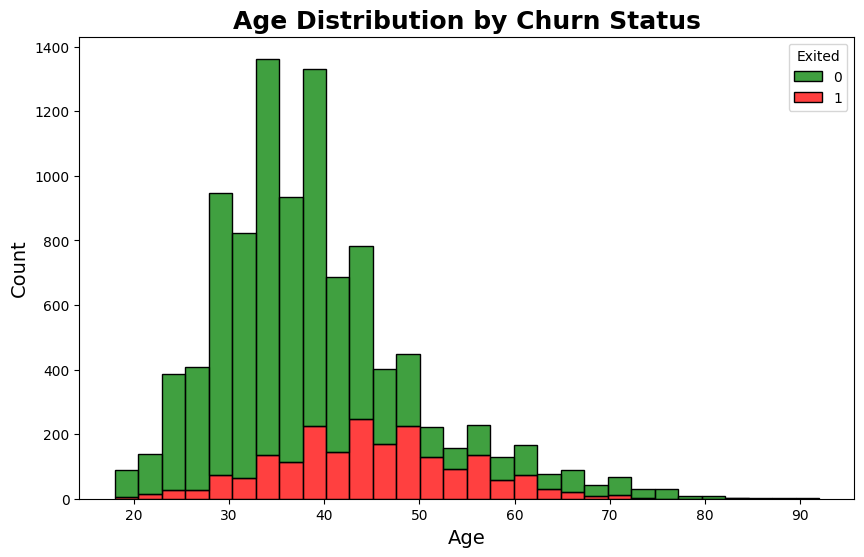

In [ ]:
# Age Distribution by Churn Status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Exited', multiple='stack', bins=30, palette={0: 'green', 1: 'red'})
plt.title('Age Distribution by Churn Status', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


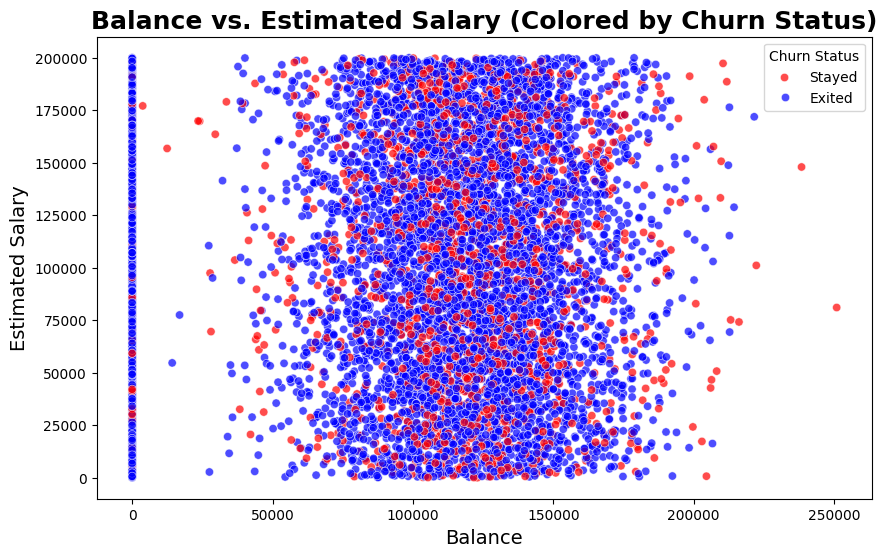

In [ ]:
# Balance vs Estimated Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Balance', y='EstimatedSalary', hue='Exited', data=data, palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.title('Balance vs. Estimated Salary (Colored by Churn Status)', fontsize=18, fontweight='bold')
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Estimated Salary', fontsize=14)
plt.legend(title='Churn Status', labels=['Stayed', 'Exited'])
plt.show()


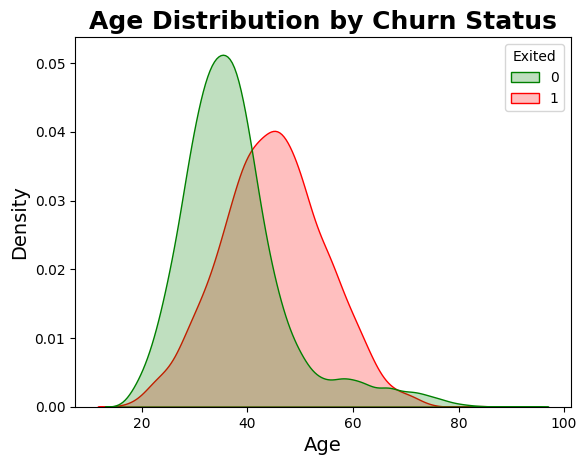

In [ ]:
figsize=(10, 6)
sns.kdeplot(data=data, x='Age', hue='Exited', fill=True, common_norm=False, palette={0: 'green', 1: 'red'})
plt.title('Age Distribution by Churn Status', fontsize=18, fontweight='bold')
# plt.figure('bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


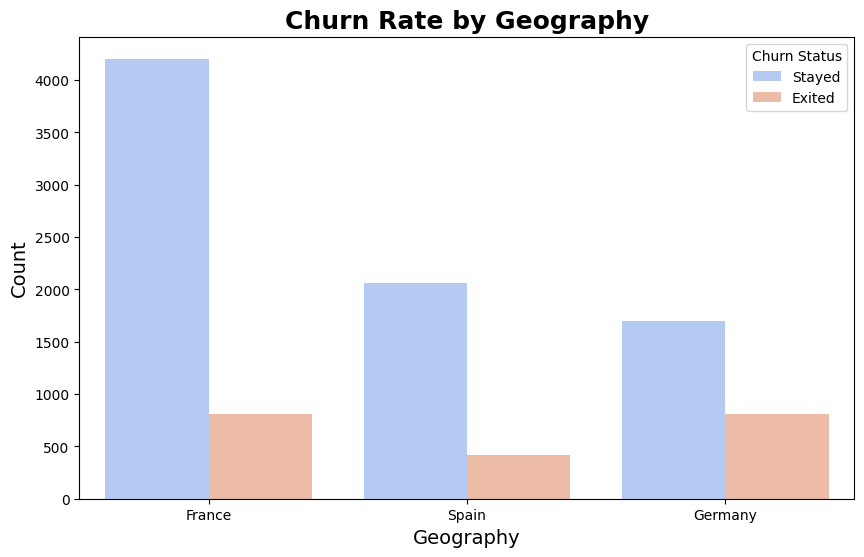

In [ ]:
# Churn Rate by Geography
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', data=data, palette='coolwarm')
plt.title('Churn Rate by Geography', fontsize=18, fontweight='bold')
plt.xlabel('Geography', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn Status', labels=['Stayed', 'Exited'])
plt.show()


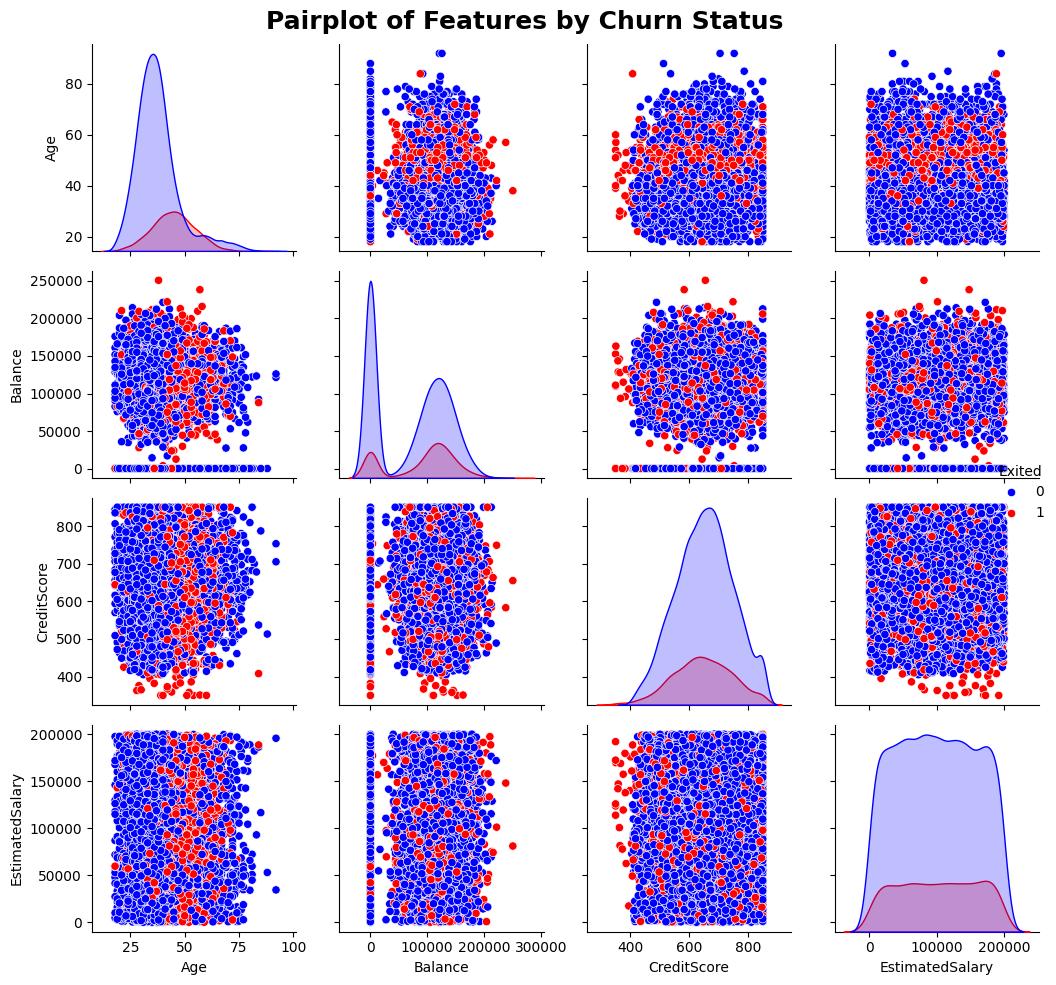

In [ ]:
# Pairplot of selected features with Churn Status
sns.pairplot(data=data[['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Exited']], hue='Exited', palette={0: 'blue', 1: 'red'})
plt.suptitle('Pairplot of Features by Churn Status', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


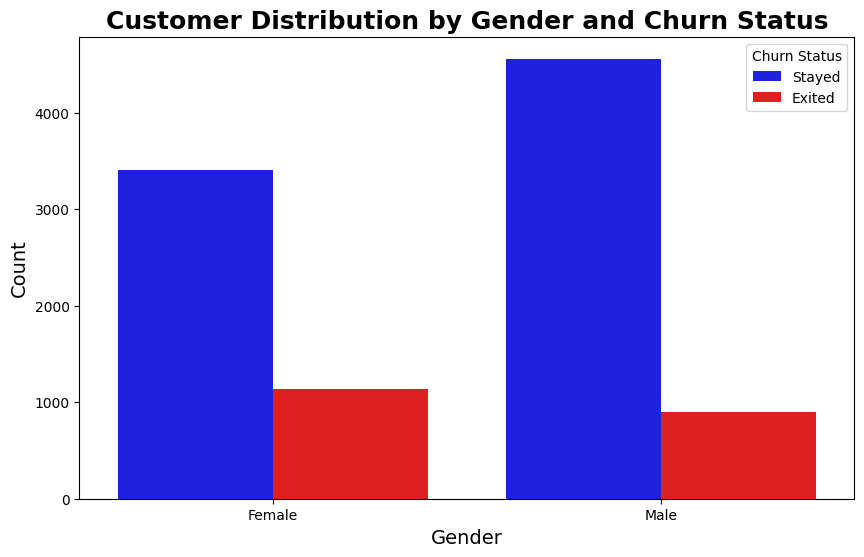

In [ ]:
# Customer Distribution by Gender and Churn Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Exited', data=data, palette={0: 'blue', 1: 'red'})
plt.title('Customer Distribution by Gender and Churn Status', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn Status', labels=['Stayed', 'Exited'])
plt.show()


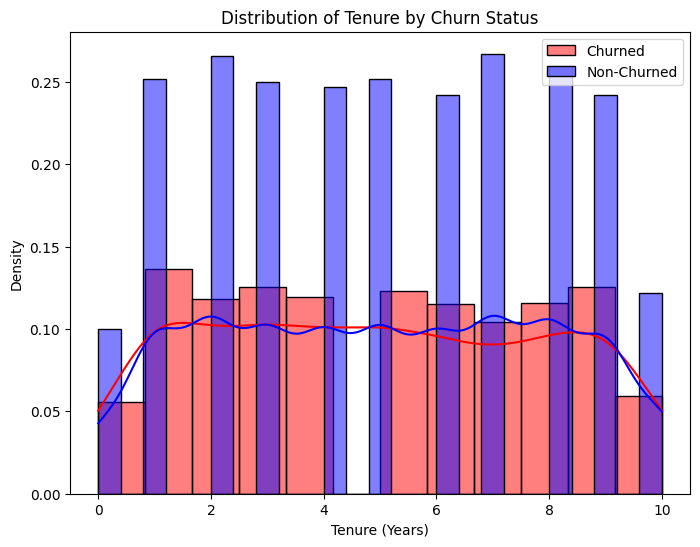

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Distribution of Tenure by Churn Status
plt.figure(figsize=(8, 6))
sns.histplot(data[data['Exited'] == 1]['Tenure'], kde=True, color='red', label='Churned', stat='density')
sns.histplot(data[data['Exited'] == 0]['Tenure'], kde=True, color='blue', label='Non-Churned', stat='density')
plt.legend()
plt.title("Distribution of Tenure by Churn Status")
plt.xlabel("Tenure (Years)")
plt.ylabel("Density")
plt.show()



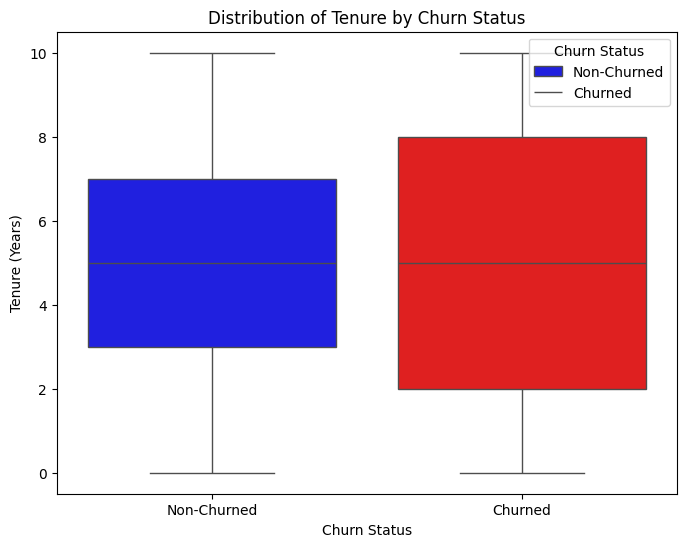

In [ ]:
# Plot 2: Boxplot of Tenure by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Tenure', data=data, hue='Exited', palette=['blue', 'red'])  # Fix: Use hue for color
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Tenure (Years)')
plt.xticks(ticks=[0, 1], labels=['Non-Churned', 'Churned'])
plt.legend(title='Churn Status', loc='upper right', labels=['Non-Churned', 'Churned'])
plt.show()

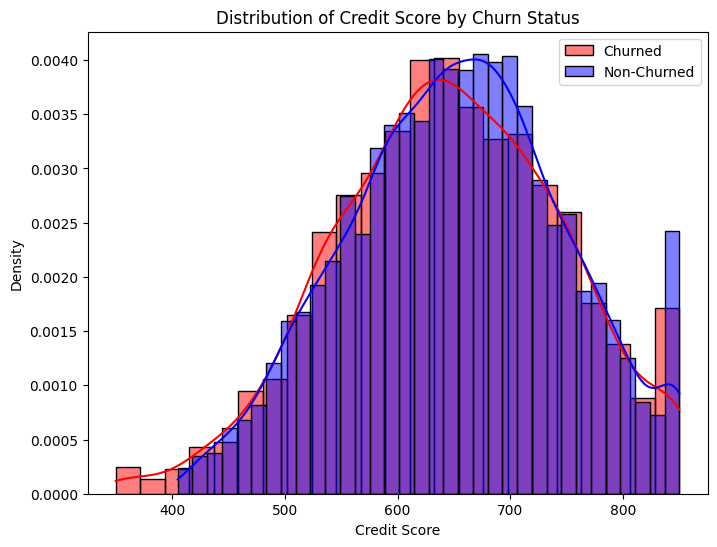

In [ ]:
# Plot 3: Distribution of Credit Score by Churn Status
plt.figure(figsize=(8, 6))
sns.histplot(data[data['Exited'] == 1]['CreditScore'], kde=True, color='red', label='Churned', stat='density')
sns.histplot(data[data['Exited'] == 0]['CreditScore'], kde=True, color='blue', label='Non-Churned', stat='density')
plt.legend()
plt.title("Distribution of Credit Score by Churn Status")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.show()

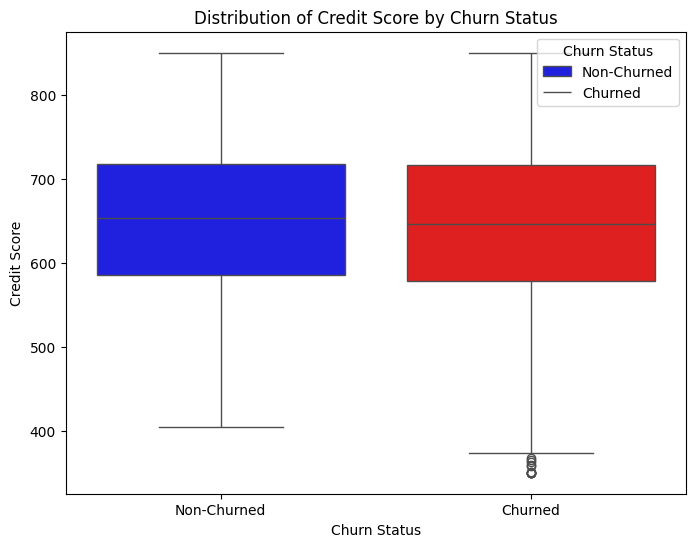

In [ ]:
# Plot 4: Boxplot of Credit Score by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='CreditScore', data=data, hue='Exited', palette=['blue', 'red'])  # Fix: Use hue for color
plt.title('Distribution of Credit Score by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Credit Score')
plt.xticks(ticks=[0, 1], labels=['Non-Churned', 'Churned'])
plt.legend(title='Churn Status', loc='upper right', labels=['Non-Churned', 'Churned'])
plt.show()

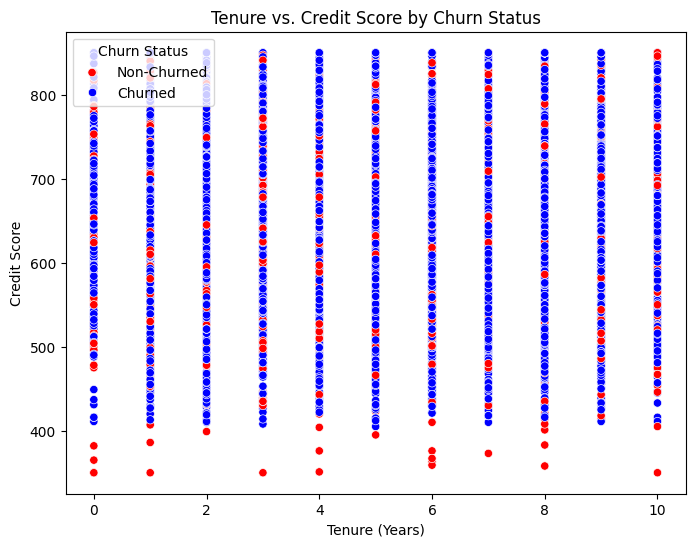

In [ ]:
# Plot 5: Tenure vs. Credit Score by Churn Status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Tenure', y='CreditScore', hue='Exited', palette={0: 'blue', 1: 'red'})
plt.title('Tenure vs. Credit Score by Churn Status')
plt.xlabel('Tenure (Years)')
plt.ylabel('Credit Score')
plt.legend(title="Churn Status", loc='upper left', labels=['Non-Churned', 'Churned'])
plt.show()

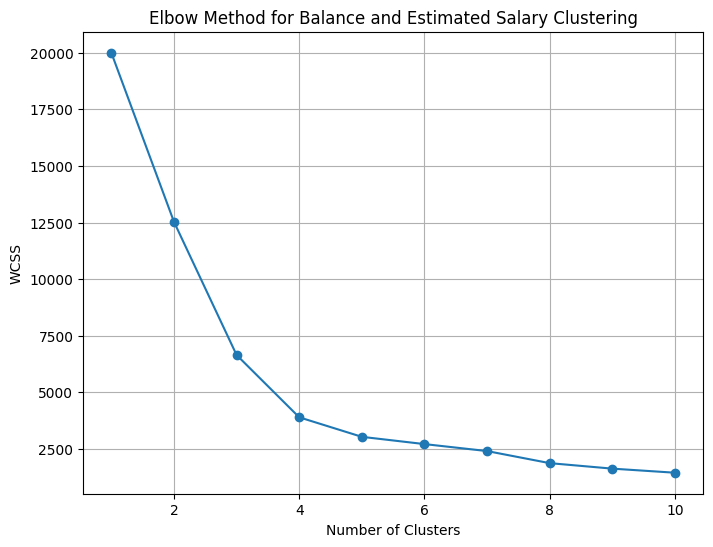

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset

data = pd.read_csv('/content/churn.csv')



# Select relevant features: Balance and EstimatedSalary
balance_salary_data = data[['Balance', 'EstimatedSalary']]



# Standardize the data
scaler = StandardScaler()
balance_salary_scaled = scaler.fit_transform(balance_salary_data)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(balance_salary_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Balance and Estimated Salary Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()



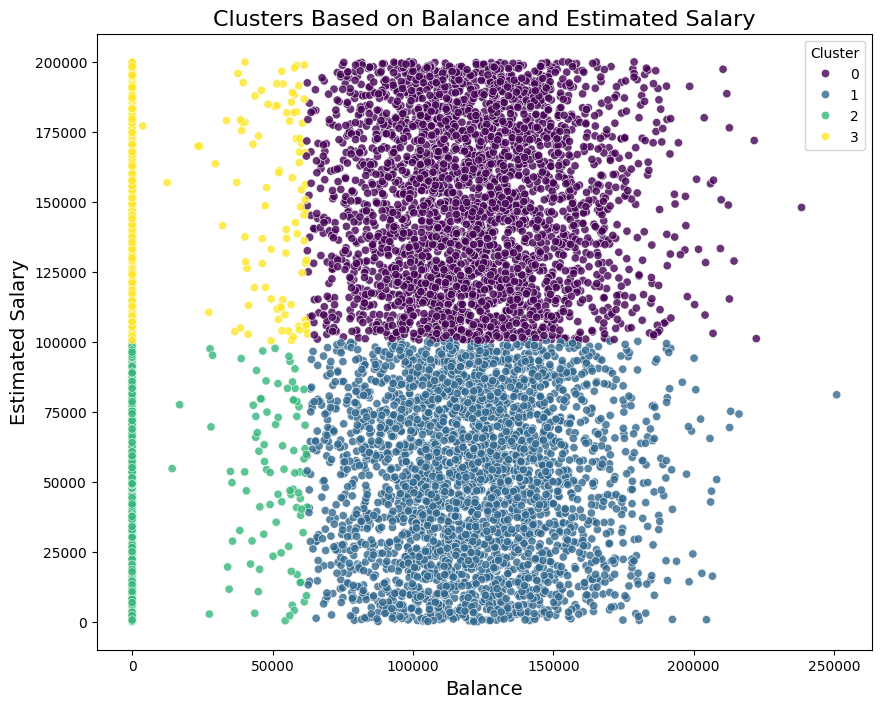


Cluster summary:
                              Balance  EstimatedSalary
Balance_Salary_Cluster                                
0                       121892.620045    149924.645412
1                       121961.604816     50650.648787
2                         2354.451201     49776.813572
3                         2589.368375    149239.935135


In [ ]:
# Perform KMeans clustering with the chosen number of clusters
optimal_clusters = 4  # Find the number from the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
balance_salary_clusters = kmeans.fit_predict(balance_salary_scaled)

# Add cluster labels to the dataset
data['Balance_Salary_Cluster'] = balance_salary_clusters

# Visualize Balance and Estimated Salary Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data['Balance'],
    y=data['EstimatedSalary'],
    hue=data['Balance_Salary_Cluster'],
    palette='viridis',
    alpha=0.8
)
plt.title('Clusters Based on Balance and Estimated Salary', fontsize=16)
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Estimated Salary', fontsize=14)
plt.legend(title='Cluster')
plt.show()

# Analyze the clusters
print("\nCluster summary:")
cluster_summary = data.groupby('Balance_Salary_Cluster')[['Balance', 'EstimatedSalary']].mean()
print(cluster_summary)


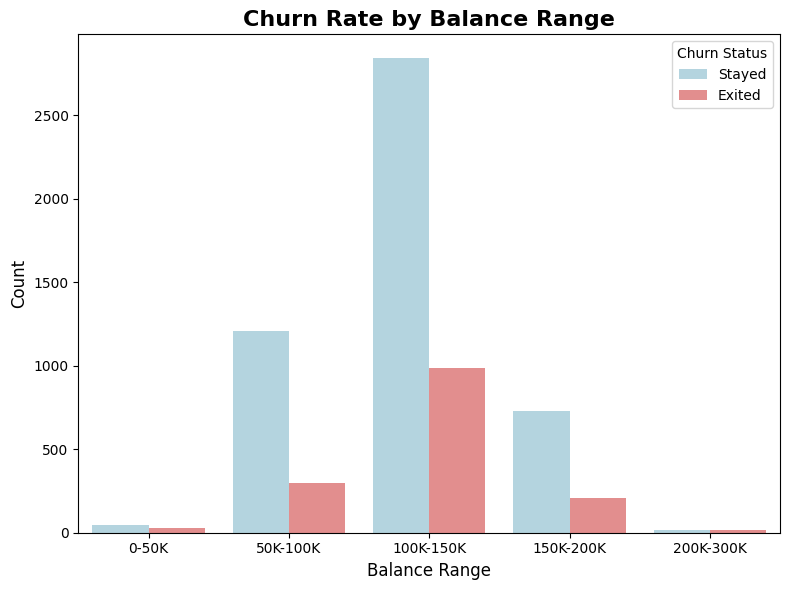

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define balance categories (optional, for grouping)
bins = [0, 50000, 100000, 150000, 200000, 250000]
labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K-300K']
data['BalanceRange'] = pd.cut(data['Balance'], bins=bins, labels=labels)

# Bar plot of BalanceRange by Churn Status
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='BalanceRange', hue='Exited', palette={0: 'lightblue', 1: 'lightcoral'})

# Title and Labels
plt.title('Churn Rate by Balance Range', fontsize=16, fontweight='bold')
plt.xlabel('Balance Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status', labels=['Stayed', 'Exited'])
plt.tight_layout()
plt.show()


<ipython-input-5-6bb2c9fcba62>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Exited'] == 0], x='EstimatedSalary', shade=True, color='green', label='Exited = 0', alpha=0.5)
<ipython-input-5-6bb2c9fcba62>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Exited'] == 1], x='EstimatedSalary', shade=True, color='red', label='Exited = 1', alpha=0.5)


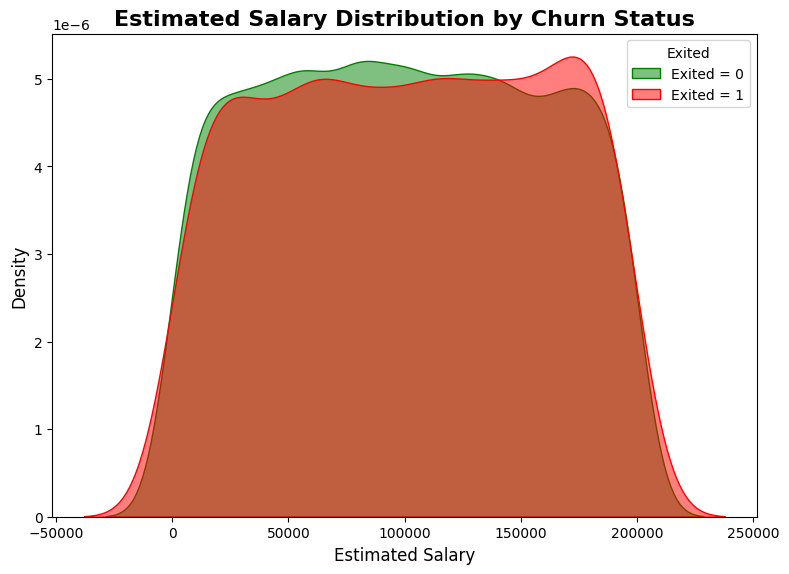

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Density plot for Estimated Salary by Churn Status
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data[data['Exited'] == 0], x='EstimatedSalary', shade=True, color='green', label='Exited = 0', alpha=0.5)
sns.kdeplot(data=data[data['Exited'] == 1], x='EstimatedSalary', shade=True, color='red', label='Exited = 1', alpha=0.5)

# Title and Labels
plt.title('Estimated Salary Distribution by Churn Status', fontsize=16, fontweight='bold')
plt.xlabel('Estimated Salary', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Exited')
plt.tight_layout()
plt.show()


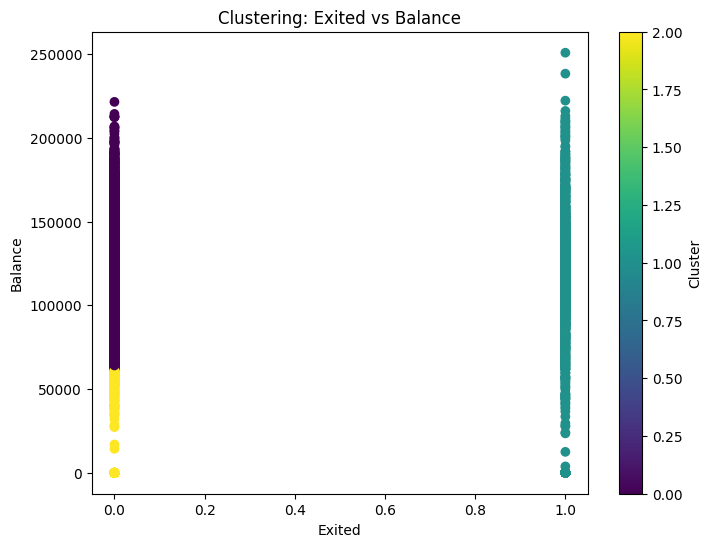

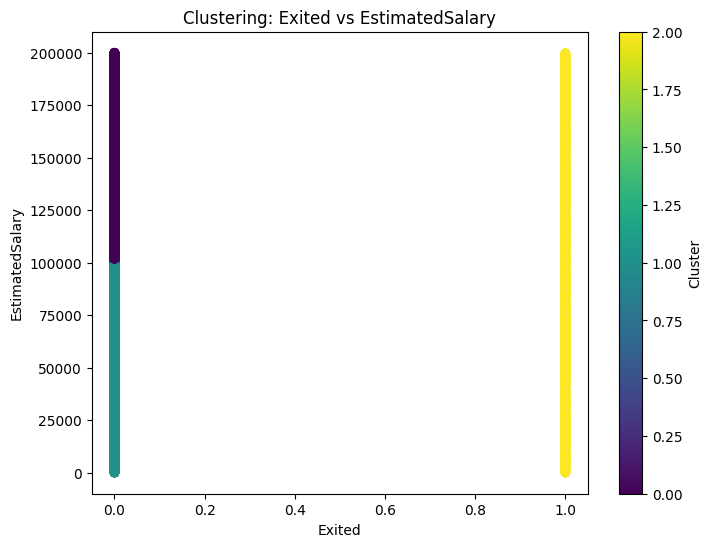

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


data = pd.read_csv('/content/churn.csv')

# Clustering based on 'Exited' and 'Balance'
subset_balance = data[['Exited', 'Balance']]

# Scale the data
scaler_balance = StandardScaler()
scaled_balance = scaler_balance.fit_transform(subset_balance)

# Perform K-Means Clustering
kmeans_balance = KMeans(n_clusters=3, random_state=42)
data['Cluster_Exited_Balance'] = kmeans_balance.fit_predict(scaled_balance)

# Clustering based on 'Exited' and 'EstimatedSalary'
subset_salary = data[['Exited', 'EstimatedSalary']]

# Scale the data
scaler_salary = StandardScaler()
scaled_salary = scaler_salary.fit_transform(subset_salary)

# Perform K-Means Clustering
kmeans_salary = KMeans(n_clusters=3, random_state=42)  # Choose 3 clusters for example
data['Cluster_Exited_Salary'] = kmeans_salary.fit_predict(scaled_salary)

# Visualize Clustering for 'Exited' vs 'Balance'
plt.figure(figsize=(8, 6))
plt.scatter(
    subset_balance['Exited'],
    subset_balance['Balance'],
    c=data['Cluster_Exited_Balance'],
    cmap='viridis'
)
plt.title('Clustering: Exited vs Balance')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.colorbar(label='Cluster')
plt.show()

# Visualize Clustering for 'Exited' vs 'EstimatedSalary'
plt.figure(figsize=(8, 6))
plt.scatter(
    subset_salary['Exited'],
    subset_salary['EstimatedSalary'],
    c=data['Cluster_Exited_Salary'],
    cmap='viridis'
)
plt.title('Clustering: Exited vs EstimatedSalary')
plt.xlabel('Exited')
plt.ylabel('EstimatedSalary')
plt.colorbar(label='Cluster')
plt.show()


